# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).
На лекциях было показано, что в этом случае проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k.$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени — это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} =
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ — это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} =
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест

После того как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2.$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

### Задание 1. Метод наименьших квадратов (3 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором — тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — $n$ точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача — по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [ ]:
import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from itertools import combinations_with_replacement
data_train = np.loadtxt('/train.txt', delimiter=',')
data_test = np.loadtxt('/test.txt', delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$:

In [ ]:
X_train = data_train[:,0]
y_train = data_train[:,1]
X_test = data_test[:,0]
y_test = data_test[:,1]

**1. [0.1 балла]** Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

In [ ]:
X = np.vstack([np.ones(len(X_train)), X_train.T]).T
Ans = sla.inv(X.T @ X) @ X.T @ np.vstack(y_train)
k = Ans[1][0]
b = Ans[0][0]
print(k, 'x + ', b, sep = '')

2.2791344980519463x + 4.433230905064934


**2. [0.15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

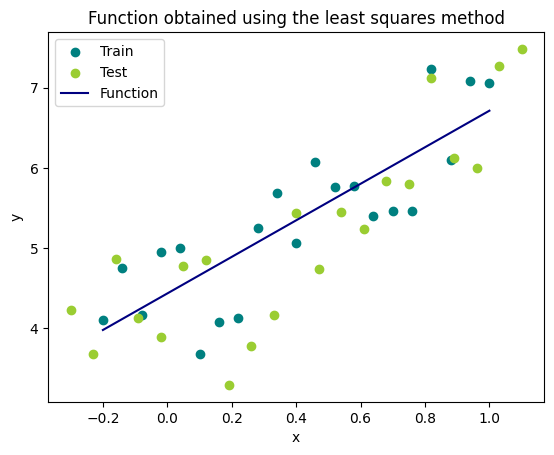

In [ ]:
plt.scatter(X_train, y_train, c = "teal", label = "Train")
plt.scatter(X_test, y_test, c = "yellowgreen", label = "Test")
linsp  = np.linspace(X.min(), X.max())
fun = k * linsp + b
plt.plot(linsp, fun, c = "navy", label = "Function");

plt.xlabel("x")
plt.ylabel("y")
plt.title("Function obtained using the least squares method")
plt.legend()
plt.show()

**3. [0.15 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и напечатайте его в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [ ]:
print(len(X_train))

21


В выборке 21 значение $\Rightarrow$ можем построить интерполяционный многочлен Лагранжа степени не более 20. Чтобы воспользоваться формулой $$\hat{a} = \left(X^TX\right)^{-1}X^Ty,$$ используемой в методе наименьших квадратов, применим к тестовым значениям функцию vander - она построит матрицу Вандермонда, которая подойдет для X при поиске функции как раз 20-й степени.

In [ ]:
V_new = np.vander(X_train, X_train.size, increasing=True)
Ans_new = (sla.inv((V_new.T @ V_new)) @ V_new.T @ np.vstack(y_train))
for i in range(0, len(Ans_new)):
    if (i == 0):
        print(Ans_new[0][0], end = '')
    else:
        if Ans_new[i] > 0:
            print(f' + {abs(Ans_new[i][0])}x^{i}', end = '')
        elif Ans_new[i] < 0:
            print(f' - {abs(Ans_new[i][0])}x^{i}', end = '')

5.099281704229356 + 3.8803748590162237x^1 - 218.1243558421475x^2 - 518.4151605145053x^3 + 14705.130352413275x^4 - 8357.461597042991x^5 - 343804.3364155599x^6 + 959873.9502871865x^7 + 1639051.3345457127x^8 - 11786900.928340586x^9 + 20128446.96295228x^10 - 9123310.5829439x^11 - 8629737.102854265x^12 + 2907979.816594127x^13 + 13449366.4987035x^14 - 11839785.909100426x^15 + 2507730.599888718x^16 + 3449968.3499307027x^17 - 9852023.646927144x^18 + 9560702.205516847x^19 - 3033177.6293634395x^20

**4. [0.1 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок.

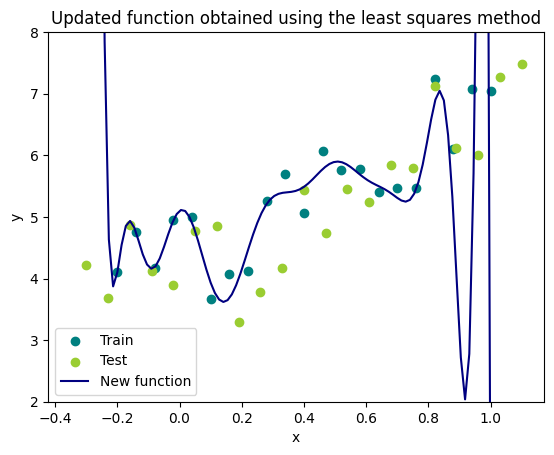

In [ ]:
plt.title('Updated function obtained using the least squares method')
plt.scatter(X_train, y_train, color='teal', label='Train')
plt.scatter(X_test, y_test, color='yellowgreen', label='Test')
plt.xlabel('x')
plt.ylabel('y')

x = np.linspace(-0.35, 1.0, 100)
y = 0
for i in range (21):
  y += Ans_new[i][0] * x ** i
plt.plot(x, y, color='navy',label='New function')
plt.ylim([2, 8])
plt.legend()
plt.show()

**5. [0.25 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Напечатайте найденные многочлены в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [ ]:
coef = []
for i in range(1, 11):
  Vand = np.vander(X_train, i + 1, increasing=True)
  poly = (sla.inv((Vand.T @ Vand)) @ Vand.T @ np.vstack(y_train))
  coef.append(poly)
  for j in range(0, len(poly)):
    if (j == 0):
        print(poly[0][0], end = '')
    else:
        if poly[i] > 0:
            print(f' + {abs(poly[j][0])}x^{j}', end = '')
        elif poly[i] < 0:
            print(f' - {abs(poly[j][0])}x^{j}', end = '')
  print('\n')


4.433230905064934 + 2.2791344980519463x^1

4.472476503404163 + 1.1578316883597188x^1 + 1.4016285121152552x^2

4.460736355285098 - 1.0650161052852845x^1 - 1.8597508372608618x^2 - 0.38176860428785253x^3

4.341166120399734 + 1.1718023926319014x^1 + 6.794091784357121x^2 + 13.051328119985834x^3 + 7.918474697313275x^4

4.431297813823028 + 0.13059803987592455x^1 + 3.2747144018344185x^2 + 21.374796276217275x^3 + 51.13148138534064x^4 + 29.524978041353673x^5

4.383795011031942 - 4.597179325424906x^1 - 16.002903990635982x^2 - 121.25709713687526x^3 - 481.51013290768856x^4 - 581.45329826952x^5 - 229.97013342829106x^6

4.44451270939923 - 4.008895912548426x^1 - 7.215458607274098x^2 - 119.35078427532906x^3 - 314.2311725473349x^4 - 122.87821723621093x^5 - 238.69936763068296x^6 - 167.38196466828578x^7

4.6637891148288135 + 5.182773539351567x^1 + 26.695631915880032x^2 + 268.8604430168827x^3 + 109.89567991302704x^4 + 3132.856467378153x^5 + 6760.628611200738x^6 + 5701.710311153486x^7 + 1729.4776076794496x^

**6. [1 балл]** Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором — по парам из тестовых данных).

In [ ]:
print("MSE for train data:\n")
for i in range(len(coef)):
  mse = 0
  for j in range(X_train.size):
    mse += (np.polyval(coef[i][::-1], X_train[j]) - y_train[j]) ** 2
  mse /= X_train.size
  print(f'MSE for degree {i + 1} equals {mse[0]}')
print('\n')
print("MSE for test data:\n")
for i in range(len(coef)):
  mse = 0
  for j in range(X_test.size):
    mse += (np.polyval(coef[i][::-1], X_test[j]) - y_test[j]) ** 2
  mse /= X_test.size
  print(f'MSE for degree {i + 1} equals {mse[0]}')

MSE for train data:

MSE for degree 1 equals 0.2968966332625197
MSE for degree 2 equals 0.2696989158766913
MSE for degree 3 equals 0.2694971871479611
MSE for degree 4 equals 0.2610665330579277
MSE for degree 5 equals 0.249985046483175
MSE for degree 6 equals 0.18829348988370137
MSE for degree 7 equals 0.18539621153294356
MSE for degree 8 equals 0.15905556579089003
MSE for degree 9 equals 0.1584718427472453
MSE for degree 10 equals 0.1531661101636306


MSE for test data:

MSE for degree 1 equals 0.4351202004048875
MSE for degree 2 equals 0.35647628878311843
MSE for degree 3 equals 0.35534645715186197
MSE for degree 4 equals 0.44172701892876765
MSE for degree 5 equals 0.557973202185384
MSE for degree 6 equals 2.5816929327305767
MSE for degree 7 equals 2.515782913024295
MSE for degree 8 equals 4.357289035159247
MSE for degree 9 equals 4.776344966987482
MSE for degree 10 equals 14.63235869797926


**7. [0.75 балла]** Для $k = 1,2,3,4,5,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

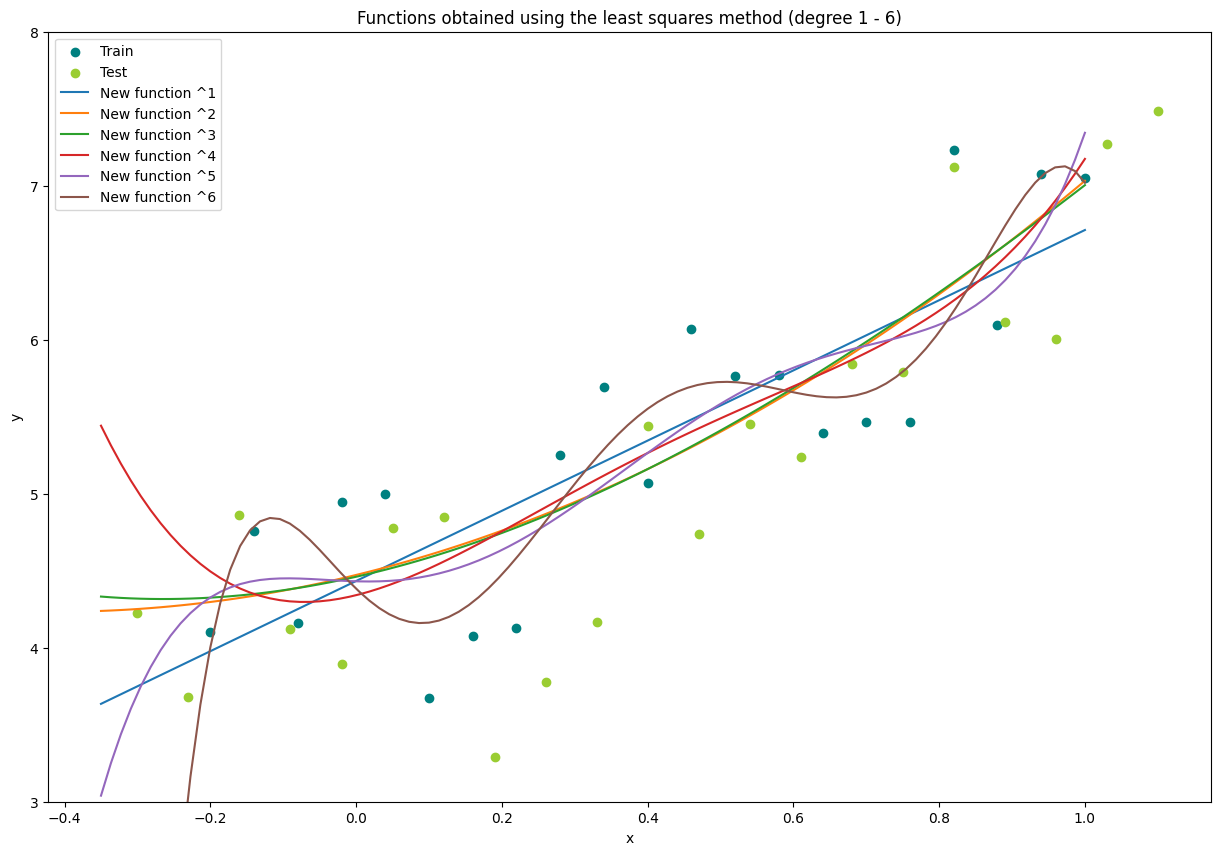

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Functions obtained using the least squares method (degree 1 - 6)')
plt.scatter(X_train, y_train, color='teal', label='Train')
plt.scatter(X_test, y_test, color='yellowgreen', label='Test')
plt.xlabel('x')
plt.ylabel('y')
x = np.linspace(-0.35, 1.0, 100)
for i in range(1, 7):
  xv = np.vander(x, i + 1, increasing=True)
  poly_coef = np.array(coef[i - 1]).reshape(-1)
  y = np.array(np.dot(xv, np.matrix(poly_coef).T)).reshape(-1)
  plt.plot(x, y, label=f'New function ^{i}')
plt.ylim([3, 8])
plt.legend()
plt.show()

**8. [0.5 балла]** Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как, по вашему мнению, в машинном обучении называется наблюдаемый вами эффект?

Данный эффект называется переобучением: мы стараемся как можно точно описать данные из тренировочной выборки, отдаляясь при этом от остальных моделей (в том числе от тестовой) $\Rightarrow$ наблюдается рост MSE, поскольку в погоне за точностью для выборки train теряем точность для выборки test.

### Задание 2. Линейная регрессия (3.5 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split` с параметром `test_size=0.3`. Не забудьте зафиксировать параметр `random_state`.

In [ ]:
data = np.loadtxt("/flats_moscow_mod.txt", dtype="str")

Train, Test = train_test_split(data[1:], test_size=0.3, random_state = 42)

Y_train = Train[:,:1].astype(np.float64)

x_train = Train[:,1:].astype(np.float64)

Y_test = Test[:,:1].astype(np.float64)

x_test = Test[:,1:].astype(np.float64)

**1. [0.5 балла]** Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [ ]:
x = np.vstack([np.ones(len(x_train)), x_train.T]).T
ans = sla.inv(x.T @ x) @ x.T @ np.vstack(Y_train)
print(f'Free coeff = {ans[0][0]}')
print(f'Totsp coeff = {ans[1][0]}')
print(f'Livesp coeff = {ans[2][0]}')
print(f'Kitsp coeff = {ans[3][0]}')
print(f'Dist coeff = {ans[4][0]}')
print(f'Metrdist coeff = {ans[5][0]}')

Free coeff = -8.100900294760365
Totsp coeff = 1.5949749963768356
Livesp coeff = 1.0603389771035308
Kitsp coeff = 2.0690499134348976
Dist coeff = -3.411989513822846
Metrdist coeff = -1.3861215319193765


**2. [0.25 балла]** Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Знак "-" перед переменной обозначает, что чем больше ее значение, тем меньше цена: действительно, чем больше расстояние до метро и центра города, тем дешевле квартира(перед Dist coeff и Metrdist coeff стоит знак минус). "+", напротив, подразумевает, что чем больше величина, тем больше цена: тут модель также описывает вполне реальную ситуацию, поскольку с ростом площади квартиры (знак плюс перед Totsp coeff, Livesp coeff, Kitsp coeff) растет и ее цена.

**3. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [ ]:
MSE = 0
Val = 0
for i in range(len(x_test)):
  Val = 0
  for j in range(len(ans)):
    if j == 0:
      Val += ans[j]
    else:
      Val += x_test[i][j - 1] * ans[j]
  MSE += (Val - Y_test[i]) ** 2
MSE /= len(x_test)
print(f'MSE equals {MSE[0]}')

MSE equals 1226.781421040998


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

**4. [0.25 балла]** Опишите признаки, которые вы решили добавить. Объясните, чем был мотивирован выбор именно этих признаков.

Я добавила kitsp^2, kitsp * dist, kitsp * metrdist, dist ^ 2, dist * metrdist, metrdist ^ 2

**5. [2 балла]** Постройте с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и новыми признаками. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [ ]:
def adding_features(features, deg):
    ans = np.ones((1, features.shape[1]))
    for line_list in combinations_with_replacement([x for x in range(features.shape[0])], deg):
        arg = np.ones((1, features.shape[1]))
        for line in line_list:
            arg *= features[line, :].reshape(1, features.shape[1])
        ans = np.concatenate((ans, arg))
    return ans[1:, :]

In [ ]:
X_data =  Train[:,[3, 4, 5]].astype(np.float64)
poly_features = adding_features(X_data.T, 2).T
poly_features = np.concatenate((np.ones((poly_features.shape[0], 1)), poly_features), axis = 1)
coeffs = sla.inv((poly_features.T @ poly_features)) @ poly_features.T @ np.vstack(Y_train)
print(f'Free coeff = {coeffs[0][0]}')
print(f'Kitsp^2 = {coeffs[1][0]}')
print(f'Kitsp * dist = {coeffs[2][0]}')
print(f'Kitsp * metrdist coeff = {coeffs[3][0]}')
print(f'Dist ^2 coeff = {coeffs[4][0]}')
print(f'Dist * metrdist coeff = {coeffs[5][0]}')
print(f'Metrdist ^2 coeff = {coeffs[6][0]}')

Free coeff = 116.34518986516332
Kitsp^2 = 0.46672774368248776
Kitsp * dist = 0.004837175117719343
Kitsp * metrdist coeff = -0.020861157426169546
Dist ^2 coeff = -0.16241535331396667
Dist * metrdist coeff = -0.0886100104784835
Metrdist ^2 coeff = 0.008455728163829283


**6. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [ ]:
MSE  = 0
X_data =  Test[:,[2, 3, 5]].astype(np.float64)
X_test = adding_features(X_data.T, 2).T
for i in range (0, len(X_test)):
    poly = 0
    for j in range(0, len(coeffs)):
        if j == 0:
            poly += coeffs[j]
        else:
            poly += X_test[i][j-1]*coeffs[j]
    MSE += (poly - Y_test[i])**2
MSE = MSE/len(X_test)
print(f'MSE equals {MSE[0]}')

MSE equals 1126898.4917358968


### Задание 3. Регуляризация (3.5 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться с помощью приведённой выше формулы. В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы — необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них — регуляризация. Сейчас мы рассмотрим одну из её разновидностей — **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda > 0$ — некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. *Гиперпараметр* $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Однако есть некоторые правила, которых стоит придерживаться при подборе коэффициента регуляризации. Обычно в такой ситуации всю выборку делят на три части: обучающую, *валидационную* и тестовую. Сначала по валидационной подбирают значение гиперпараметра, потом по обучающей строят модель, а по тестовой оценивают её итоговое качество. Кроме того, подбирать $\lambda$ нужно по логарифметической сетке, чтобы узнать оптимальный порядок величины.

**1. [0.25 балла]** Почему не стоит подбирать коэффициент регуляризации по обучающей выборке? По тестовой выборке?

Если подбирать коэффициент регуляризации по оучающей или тестовой выборке возникнет проблема переобучения, т.е. он будет давать хорошую точность только на рассматриваемых обучающих/тестовых данных.

**2. [0 баллов]** Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Попытаемся использовать регуляризацию при построении модели. Поделите обучающую выборку из первой задачи на две части, одну из которых объявите обучающей, а другую — валидационной (будьте осторожны при выборе `train_size`, в этой выборке не так много данных).

In [ ]:
data_train = np.loadtxt('/train.txt', delimiter=',')
data_test = np.loadtxt('/test.txt', delimiter=',')
data_train, data_validation = train_test_split(data_train, train_size=0.7, random_state = 42)
X_train = data_train[:,0]
y_train = data_train[:,1]
X_test = data_test[:,0]
y_test = data_test[:,1]
X_valid = data_validation[:,0]
y_valid = data_validation[:,1]

**3. [0.75 балла]** Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регуляризации.

In [ ]:
def mse(x, y, f):
  ans = 0
  for i in range(len(x)):
    ans += (np.polyval(f[::-1], x[i]) - y[i]) ** 2
  ans = ans / len(x)
  return ans
def func(x, y):
  return (sla.inv(x.T @ x) @ x.T @ np.vstack(y))

Из полученных в задании 1.6 результатов видно, что MSE для тестовых данных наименьшая у ф-ии 3-ей степени, значит, многочлен 3-й степени и будем считать оптимальным.

In [ ]:
Vand_4 = np.vander(X_valid, 4, increasing=True)
E = np.eye(4)
mse_min = 10 ** 10
lmbd = 0
for i in range(1, 100):
  lmbd_cur = i / 100
  f_new = (sla.inv((Vand_4.T @ Vand_4 + lmbd_cur * E)) @ Vand_4.T @ np.vstack(y_valid))
  mse_new = mse(X_test, y_test, f_new)
  if mse_new < mse_min:
    mse_min = mse_new
    lmbd = lmbd_cur
X = np.vander(X_train, 4, increasing = True)
F = func(X, y_train)
MSE = mse(X_test, y_test, F)
print(f"MSE без регуляризации = {MSE[0]}")
F = (sla.inv((X.T @ X + lmbd * E)) @ X.T @ np.vstack(y_train))
MSE = mse(X_test, y_test, F)
print(f"MSE при регуляризации = {MSE[0]}")
print(f"Коэффициент равен {lmbd}")

MSE без регуляризации = 0.35335597530382606
MSE при регуляризации = 0.2897059826690956
Коэффициент равен 0.84


**4. [0.25 балла]** Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$. Теоретически объясните полученный результат, доказав, что $\det(X^TX+\lambda E) > 0$ при $\lambda>0$.

In [ ]:
print(sla.det(X.T @ X))
print(sla.det(X.T @ X + lmbd * E))

1.130159554654652e-14
220.21638110381014


Регуляризация решает проблему близости матрицы $X^TX$ к невырожденной, это видно из получившегося результата: сначала определитель был близок к 0, а затем увеличился.

Регуляризация, вводящая штрафы на коэффициенты из a, приводит к замедлению скорости их роста и делает модель более универсальной (минимизируем "скачки" на обучающих значениях) за счет увеличения значений $X^TX$. Однако после применения данной операции эта матрица не может стать невырожденной (после изменения диагональных элментов строки/столбцы этой матрицы не могут стать линейно зависимыми).

**5. [0.25 балла]** Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без.

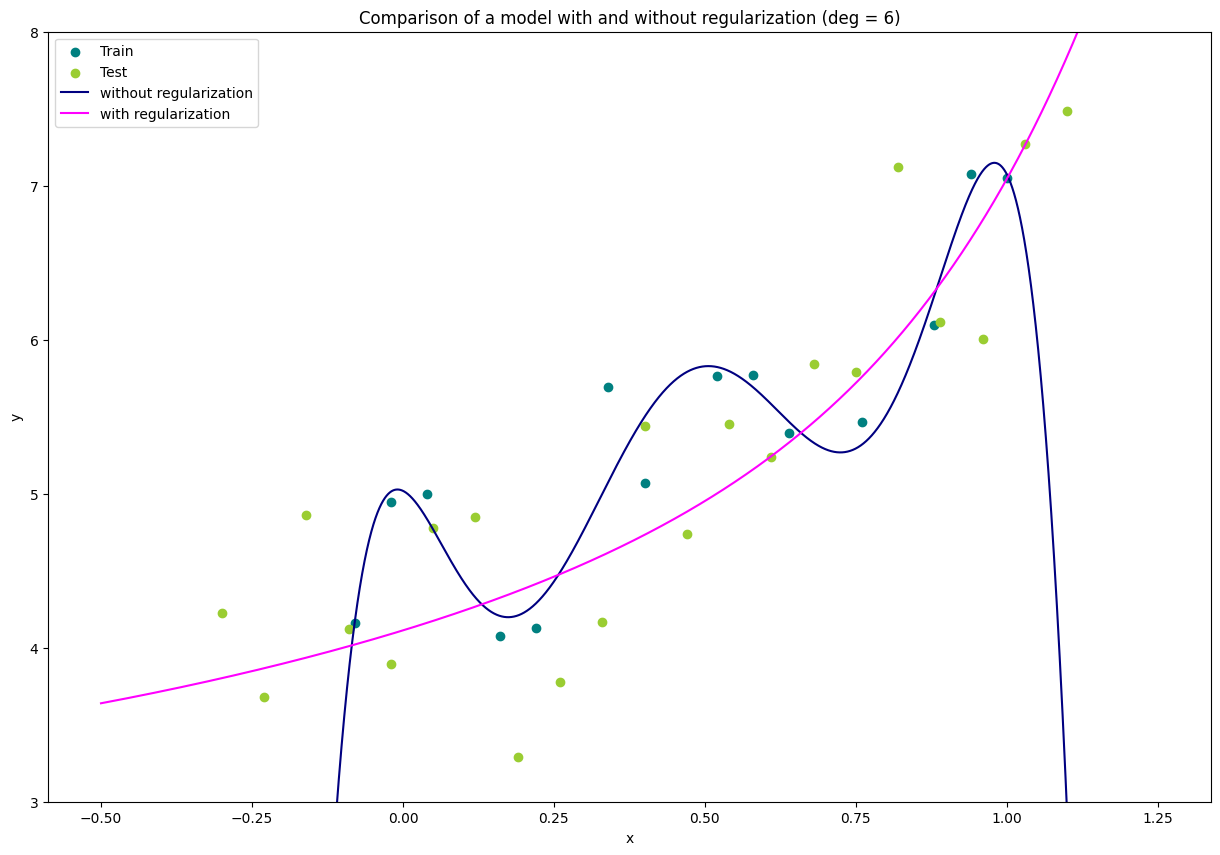

In [ ]:
Vand_7 = np.vander(X_valid, 7, increasing=True)
E = np.eye(7)
mse_min = 10 ** 10
lmbd = 0
for i in range(1, 100):
  lmbd_cur = i / 100
  f_new = (sla.inv((Vand_7.T @ Vand_7 + lmbd_cur * E)) @ Vand_7.T @ np.vstack(y_valid))
  mse_new = mse(X_test, y_test, f_new)
  if mse_new < mse_min:
    mse_min = mse_new
    lmbd = lmbd_cur
X = np.vander(X_train, 7, increasing=True)
F = func(X, y_train)
F_with_reg = (sla.inv((X.T @ X + lmbd*E)) @ X.T @ np.vstack(y_train))
plt.scatter(X_train, y_train, c = 'teal', label='Train')
plt.scatter(X_test, y_test, c = 'yellowgreen', label='Test')
plt.plot(x, np.polyval(F[::-1], x), c = 'navy', label = 'without regularization')
plt.plot(x, np.polyval(F_with_reg[::-1], x), c = 'magenta', label = 'with regularization')
plt.title('Сomparison of a model with and without regularization (deg = 6)')
plt.figure(figsize=(15, 10))
plt.ylim([3, 8])
x = np.linspace(-0.5, 1.25, 10000)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

**6. [0.25 балла]** Чем первый из них выгодно отличается от второго?

Из графика видно, что модель без регуляризации подстраивается только под тренировочные данные, а модель с регуляризацией описывает общую закономерность.

**7. [0.75 балла]** Пусть заданы $X\in \text{Mat}_{n \times k}(\mathbb{R})$ ($k \leqslant n$), $y \in \mathbb{R}^n$, $\lambda \geqslant 0$, а также известно, что $\text{rk}~X = k$. Решите теоретически следующую задачу оптимизации:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$
(То есть найдите все векторы $a \in \mathbb{R}^k$, для которых выражение слева принимает наименьшее возможное значение.) В частности, докажите существование решений и укажите их количество в зависимости от входных данных.

**8. [0.25 балла]** Попробуйте объяснить, почему регуляризовать (штрафовать за слишком большую абсолютную величину) коэффициент при константном признаке (который состоит из одних единиц) — плохая идея.

Если мы будем штрафовать коэффициент при конст признаке за слишком большую величину, то модель может потерять точность, так как этот коэффициент не зависит от входных данных и может задавать определенное значение, которые принимают переменные, близкие к 0, а при его уменьшении получится, что эти значения тоже приблизятся к 0 (однако для некоторых моделей это некорректно, поскольку разница может быть существенна и сильно влиять на точность).

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Обозначим $X_{(t)} = (x_1\ldots x_t)^T$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

**1. [1 балл]** И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$, и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$. Опишите ваш алгоритм теоретически и обоснуйте его сложность.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**2. [2 балла]** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(5x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

In [ ]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)


for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()

    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

    # the rest of the code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')

        #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

        y_pred = #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')

        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ — матрица с ортонормированными столбцами, а $R$ — верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ — столбцы матрицы $A$, $q_1,\ldots,q_t$ — столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ — это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.